Problem statement : The purpose of this notebook is to "predict stock prices using machine learning and deep learning models".Like many aspiring modellers, I have picked up prices of Apple Inc for my analysis.After downloading and preparing the data,I started with

Model 1) Decision tree regressor :Decision tree regressors are part of the broader family of decision tree models that are utilized in both classification and regression tasks. Our problem is a regression problem. The primary advantages of this model is ease of Interpretability, easy to implement, Availability in Libraries etc, this model is prone to overfitting.

Model 2) Random forest regression tree : Random forest methods are built on ensemble forecasts to address the problem of overfitting. These are more robust, accurate, easy to implement and parallelization etc.                   

Model 3) Vanilla RNN : Recurrent Neural Networks (RNNs) model for stock prediction involves leveraging the sequential nature of time-series data to capture temporal dependencies and patterns. I have tried parameter tuning while experimenting with a couple of activation parameters and learning rate.     

Model 4) LSTM model : LSTM is probably one of the most popular deep learning algorithms for stock prediction problems. LSTM models have the ability to handle long-term dependencies and reduce vanishing gradient problems. LSTM has an excellent ability to capture intricate patterns. I have keras to build this.

Model 5) LSTM model with feature engineering : I have created 8 popular technical analysis metrics - (a) 5day moving average, (b) 10day moving average, (c) 21day moving average, (d) exponential moving average, (e) moving average convergence divergence, (f) relative strength index, (g) ichimoku conversion line and (h) ichimoku base line. Applied XGboost to get most important features and then applied LSTM model on four of these most important features.

For each of these models, I have calculated evaluation metrics and graphs to assess the model

In [55]:
# imports
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics
import sklearn.ensemble
import keras
from keras.layers import SimpleRNN, Dense
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import LSTM
import math
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [56]:
# import data for a stock which is every modeller's favourite -Apple Inc, code = AAPL
yf.pdr_override()
y_symbols = ['AAPL']
from datetime import datetime
enddate = datetime(2022,12,31)
startdate = datetime(2013,1,2)
AAPL = pdr.get_data_yahoo(y_symbols, end=enddate,start =startdate)
AAPL.reset_index(inplace=True)
AAPL =AAPL.drop('Date',axis=1)

[*********************100%%**********************]  1 of 1 completed


In [57]:
data = pd.DataFrame(AAPL)

In [58]:
# Making predictions one month in the future, there are typically 22 trading days in a month
TimeFrame = 22
data["Prediction"] = data[["Close"]].shift(-TimeFrame)
print(data.head())
print(data.tail())

        Open       High        Low      Close  Adj Close     Volume  \
0  19.779285  19.821428  19.343929  19.608213  16.769098  560518000   
1  19.567142  19.631071  19.321428  19.360714  16.557428  352965200   
2  19.177500  19.236786  18.779642  18.821428  16.096231  594333600   
3  18.642857  18.903570  18.400000  18.710714  16.001547  484156400   
4  18.900356  18.996071  18.616072  18.761070  16.044609  458707200   

   Prediction  
0   15.797143  
1   16.351429  
2   16.333929  
3   16.722143  
4   16.963572  
            Open        High         Low       Close   Adj Close    Volume  \
2513  130.919998  132.419998  129.639999  131.860001  131.127060  63814900   
2514  131.380005  131.410004  128.720001  130.029999  129.307236  69007800   
2515  129.669998  131.029999  125.870003  126.040001  125.339409  85438400   
2516  127.989998  130.479996  127.730003  129.610001  128.889572  75703700   
2517  128.410004  129.949997  127.430000  129.929993  129.207779  77034200   

      Pr

Model 1 : Decision tree Regressor                                               
This supervised learning algorithm can be applied to stock price prediction due to its ability to model and predict continuous variables

In [ ]:
# Splitting the data for training and testing
x = np.array(data.drop(["Prediction"], 1))[:-TimeFrame]
y = np.array(data["Prediction"])[:-TimeFrame]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)



<ipython-input-5-ae88ea8ed18b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop(["Prediction"], 1))[:-TimeFrame]


In [60]:
# Creating the decision tree regressor model
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# Prediction
xfuture = data.drop(["Prediction"], 1)[:-TimeFrame]
xfuture = xfuture.tail(TimeFrame)
xfuture = np.array(xfuture)

treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [148.02999878 148.30999756 147.80999756 146.63000488 142.91000366
 140.94000244 142.6499939  141.66000366 121.08999634 145.47000122
 143.21000671 136.5        134.50999451 136.5        132.30000305
 135.44999695 141.55999756 131.86000061 171.13999939 126.04000092
 169.24000549 129.92999268]


<ipython-input-60-5f2546986928>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  xfuture = data.drop(["Prediction"], 1)[:-TimeFrame]


<ipython-input-61-5d7636ddad13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


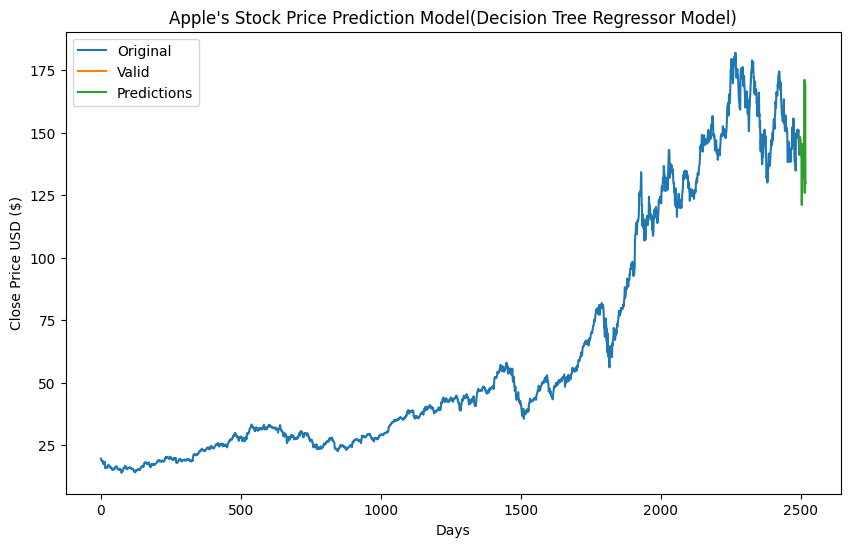

In [61]:
predictions = treePrediction
valid = data[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(data["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()


In [62]:
#Evaluation
y_pred = tree.predict(xtest)
print('Mean absolute error:', np.mean(np.abs(y_pred.ravel() - ytest)))
print('Mean squared error:', np.mean((y_pred.ravel() - ytest)**2))
print('Root mean squared error:', np.sqrt(np.mean((y_pred.ravel() - ytest)**2)))

Mean absolute error: 4.50182732963562
Mean squared error: 58.87375359392826
Root mean squared error: 7.672923405972997


Conclusion : Regression tree Model evaluation parameters are not looking good. Exploring random forest model

Model 2 : Random forest regressor                                               
The shortcoming of overfitting in decision tree regressor can be addressed by ensemble learning method - Random forest regressor.
This supervised learning algorithm constructs and trains on a multitude of decision trees. Output is the mean of the individual trees.

In [64]:
# Creating the decision tree regressor model

RFtree = RandomForestRegressor(n_estimators = 1000, oob_score = True, criterion="gini", random_state=42)
RFtree = RandomForestRegressor().fit(xtrain, ytrain)

# prediction
RFtreePrediction = RFtree.predict(xfuture)
print("Random Forest Regressor =",RFtreePrediction)

Random Forest Regressor = [150.27189888 147.2993988  148.65529831 146.01110245 144.82090256
 139.07840149 143.13219597 144.252901   125.73390007 145.94610046
 143.27420456 141.6657     139.46979614 148.12380043 137.18540268
 145.40819824 162.50400101 139.77430077 159.89269958 134.61510117
 154.50510071 136.08469589]


<ipython-input-65-f456ef53c9fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


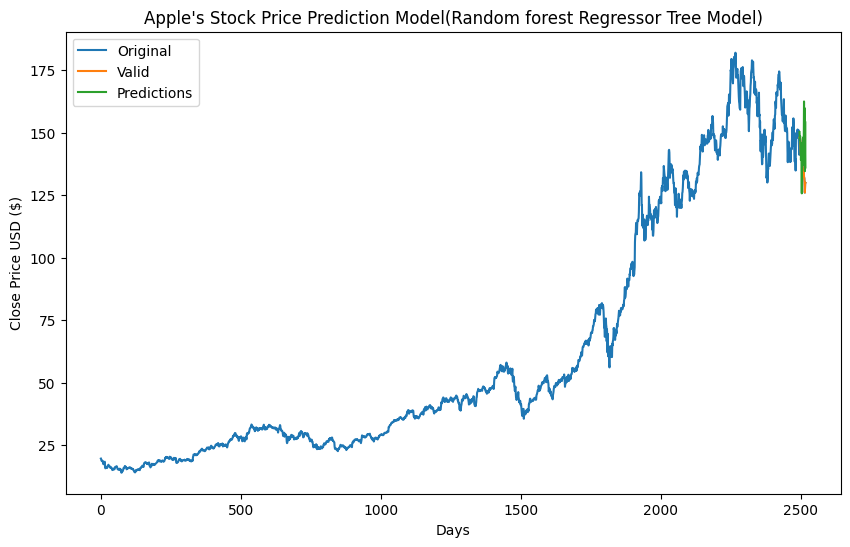

In [65]:
predictions = RFtreePrediction
valid = data[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Random forest Regressor Tree Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(data["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [66]:
#Evaluation
y_pred = RFtree.predict(xtest)

print('Mean absolute error:', np.mean(np.abs(y_pred.ravel() - ytest)))
print('Mean squared error:', np.mean((y_pred.ravel() - ytest)**2))
print('Root mean squared error:', np.sqrt(np.mean((y_pred.ravel() - ytest)**2)))

Mean absolute error: 3.47286519247055
Mean squared error: 35.84959949757505
Root mean squared error: 5.987453506923878


Conclusion : Ensemble Model random forest regressor results show unacceptable MSE values. Evaluation parameters seem have bettered than decision tree regressor but not upto the mark, hence exploring better models


Model 3(a) : Vanilla RNN model                                                  
RNNs are often considered more suitable for stock prediction tasks as these algorithms leverage on the network's ability to capture sequential dependencies in time series data. First, trying with  relu activation parameter

In [67]:
data = pd.DataFrame(data)
data = data.to_numpy()

# Splitting the data into training and test sets
train_data = data[:int(0.8 * len(data))]
test_data = data[int(0.8 * len(data)):]


Epoch 1/100
63/63 [==============================] - 1s 5ms/step - loss: 8104837120000.0000
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 16394176512.0000
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 75266624.0000
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 47318.7773
Epoch 5/100
63/63 [==============================] - 0s 5ms/step - loss: 2060.8933
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 1808.4933
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 2475.6184
Epoch 8/100
63/63 [==============================] - 0s 5ms/step - loss: 2070.5520
Epoch 9/100
63/63 [==============================] - 0s 4ms/step - loss: 2911.6077
Epoch 10/100
63/63 [==============================] - 0s 6ms/step - loss: 9570.3350
Epoch 11/100
63/63 [==============================] - 0s 7ms/step - loss: 2984.3420
Epoch 12/100
63/63 [==============================] - 0s 7ms/ste

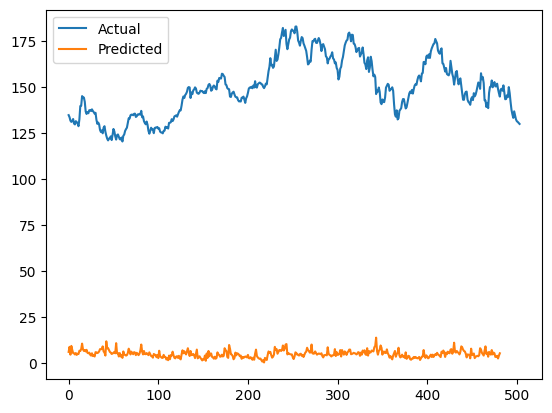

In [68]:

# Create the RNN model
model = keras.Sequential()
model.add(SimpleRNN(units=128, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_data, train_data[:, 1], epochs=100)

# Evaluate the model
model.evaluate(test_data, test_data[:, 1])

# Make predictions
predictions = model.predict(test_data)

# Plot the predictions
plt.plot(test_data[:, 1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

Conclusion : RNN Model output does not look encouraging

Model 3 (b) : RNN Modelling with  tanh activation parameter

Epoch 1/100
63/63 [==============================] - 1s 5ms/step - loss: 1610.7600
Epoch 2/100
63/63 [==============================] - 0s 5ms/step - loss: 1055.3315
Epoch 3/100
63/63 [==============================] - 0s 5ms/step - loss: 820.7288
Epoch 4/100
63/63 [==============================] - 0s 7ms/step - loss: 661.4761
Epoch 5/100
63/63 [==============================] - 0s 7ms/step - loss: 546.7476
Epoch 6/100
63/63 [==============================] - 0s 7ms/step - loss: 462.5568
Epoch 7/100
63/63 [==============================] - 0s 7ms/step - loss: 398.6205
Epoch 8/100
63/63 [==============================] - 0s 7ms/step - loss: 348.0375
Epoch 9/100
63/63 [==============================] - 0s 6ms/step - loss: 306.3372
Epoch 10/100
63/63 [==============================] - 0s 4ms/step - loss: 270.7332
Epoch 11/100
63/63 [==============================] - 0s 5ms/step - loss: 239.4389
Epoch 12/100
63/63 [==============================] - 0s 4ms/step - loss: 212.8362
Epoch 13/10

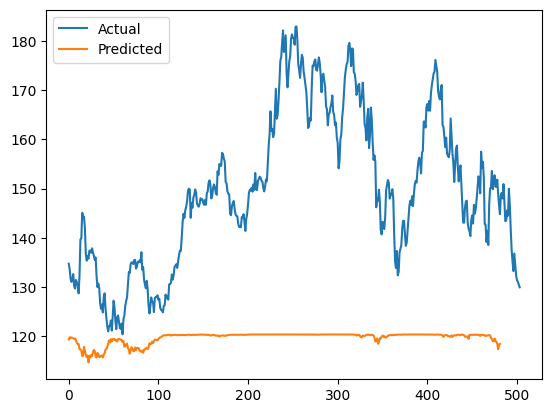

In [69]:
# Create the RNN model
model = keras.Sequential()
model.add(SimpleRNN(units=128, activation='tanh', input_shape=(train_data.shape[1], 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_data, train_data[:, 1], epochs=100)

# Evaluate the model
model.evaluate(test_data, test_data[:, 1])

# Make predictions
predictions = model.predict(test_data)

# Plot the predictions
plt.plot(test_data[:, 1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


Conclusion : RNN Model with tanh activation seems to have performed worse than relu activation evaluation parameters; going back to relu activation

Model 3 (c) : Iterating with learning rate and 'relu' activation params

Epoch 1/1000
63/63 [==============================] - 1s 5ms/step - loss: 2048141557760.0000
Epoch 2/1000
63/63 [==============================] - 0s 5ms/step - loss: 3639441408.0000
Epoch 3/1000
63/63 [==============================] - 0s 5ms/step - loss: 5625615.0000
Epoch 4/1000
63/63 [==============================] - 0s 5ms/step - loss: 15070.1045
Epoch 5/1000
63/63 [==============================] - 0s 6ms/step - loss: 2178.9131
Epoch 6/1000
63/63 [==============================] - 1s 9ms/step - loss: 2141.9814
Epoch 7/1000
63/63 [==============================] - 1s 10ms/step - loss: 2124.7629
Epoch 8/1000
63/63 [==============================] - 1s 8ms/step - loss: 2117.1514
Epoch 9/1000
63/63 [==============================] - 1s 11ms/step - loss: 2127.9370
Epoch 10/1000
63/63 [==============================] - 1s 9ms/step - loss: 2139.9617
Epoch 11/1000
63/63 [==============================] - 0s 7ms/step - loss: 2206.8733
Epoch 12/1000
63/63 [==============================] 

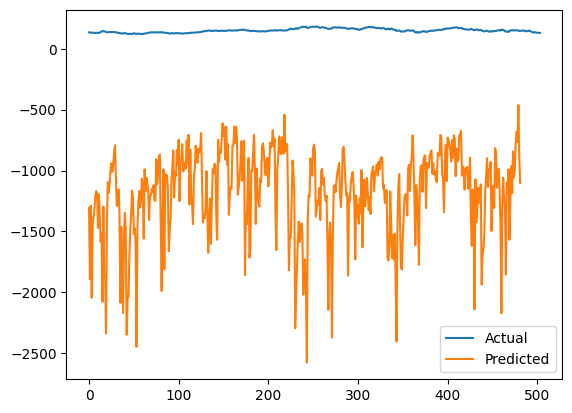

In [70]:
# Create the RNN model
model = keras.Sequential()
model.add(SimpleRNN(units=128, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(Dense(units=1))

# Compile the model
def Adam(learning_rate=0.0001):
  return tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Train the model
model.fit(train_data, train_data[:, 1], epochs=1000)

# Evaluate the model
model.evaluate(test_data, test_data[:, 1])

# Make predictions
predictions = model.predict(test_data)

# Plot the predictions
plt.plot(test_data[:, 1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


Conclusion : RNN Model with learning rate results are not encouraging


Model 4 : LSTM Model                                                            
Iterating with LSTM model which is considered superior to vanilla RNN model for stock prediction as stock prediction problems involve sequential data. LSTM models have the ability to capture long-term dependencies and mitigate the vanishing gradient problem.




In [ ]:
!pip install keras


In [71]:
# Preparing the sets
scaler = MinMaxScaler(feature_range=(0,1))

train = pd.DataFrame(data[0:int(len(data)*0.80)])
test = pd.DataFrame(data[int(len(data)*0.80): int(len(data))])

train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

data_training_array = scaler.fit_transform(train_close)

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

past_100_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)
final_df = past_100_days.append(test_df, ignore_index = True)
input_data = scaler.fit_transform(final_df)

x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)



<ipython-input-71-e5a75a506083>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [72]:
#Building LSTM model

model = keras.Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [73]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_9 (LSTM)               (None, 120)              

In [74]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)

Epoch 1/50
60/60 [==============================] - 28s 353ms/step - loss: 0.0199 - MAE: 0.0882 - val_loss: 0.0172 - val_MAE: 0.1090
Epoch 2/50
60/60 [==============================] - 20s 327ms/step - loss: 0.0041 - MAE: 0.0421 - val_loss: 0.0180 - val_MAE: 0.1079
Epoch 3/50
60/60 [==============================] - 22s 362ms/step - loss: 0.0039 - MAE: 0.0397 - val_loss: 0.0196 - val_MAE: 0.1122
Epoch 4/50
60/60 [==============================] - 21s 349ms/step - loss: 0.0037 - MAE: 0.0383 - val_loss: 0.0151 - val_MAE: 0.0998
Epoch 5/50
60/60 [==============================] - 21s 344ms/step - loss: 0.0033 - MAE: 0.0359 - val_loss: 0.0130 - val_MAE: 0.0939
Epoch 6/50
60/60 [==============================] - 20s 343ms/step - loss: 0.0025 - MAE: 0.0317 - val_loss: 0.0144 - val_MAE: 0.0974
Epoch 7/50
60/60 [==============================] - 20s 340ms/step - loss: 0.0025 - MAE: 0.0317 - val_loss: 0.0129 - val_MAE: 0.0931
Epoch 8/50
60/60 [==============================] - 19s 323ms/step - 

In [75]:
y_pred = model.predict(x_test)
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

16/16 [==============================] - 2s 83ms/step


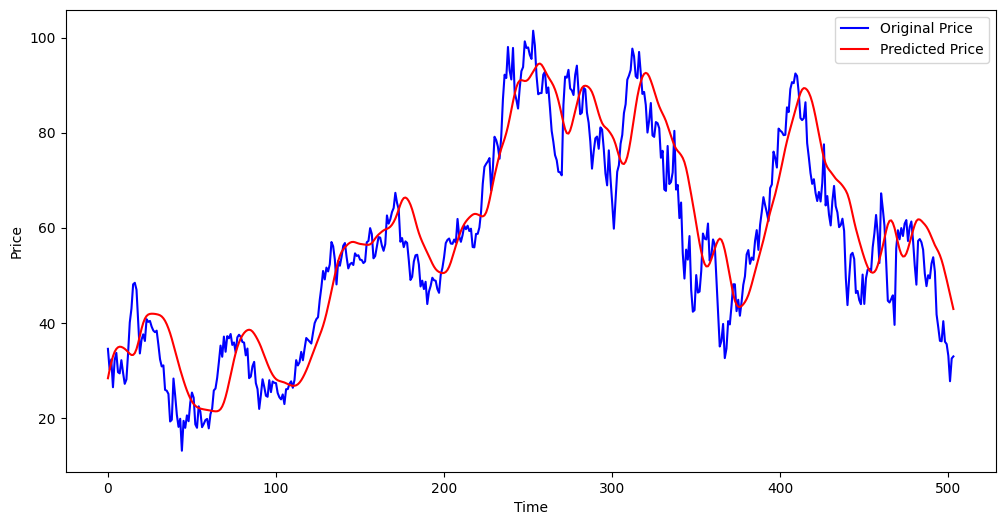

In [76]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [77]:
# Evaluation
print("Mean absolute error on test set: ", mean_absolute_error(y_test, y_pred))
print("Mean squared error on test set: ", mean_squared_error(y_test, y_pred))

Mean absolute error on test set:  6.96214528848777
Mean squared error on test set:  73.46244907603052


Conclusion : Graphical representation seems to be looking ok, however evaluation metrics are still high. Hence trying to better the model.

Model 5 : LSTM model with features from feature engineering                     
Trying to model based on features from technical analysis, like MA5 , MA10, MA21, Exponential moving average, MACD, Relative strength index, Ichimoku conversion line and Ichimoku base line

In [78]:
#function to generate feature technical indicators
data = pd.DataFrame(AAPL)
def get_technical_indicators(data):

# Calculate 5,10 and 21 days Moving Average
  data['ma5'] = data['Close'].rolling(window = 5).mean()
  data['ma10'] = data['Close'].rolling(window = 10).mean()
  data['ma21'] = data['Close'].rolling(window = 21).mean()
  # Calculate MACD
  data['26ema'] = data['Close'].ewm(span=26).mean()
  data['12ema'] = data['Close'].ewm(span=12).mean()
  data['MACD'] = (data['12ema']-data['26ema'])

#Calculate Exponential moving average
  data['ema'] = data['Close'].ewm(com=0.5).mean()
# Calculate  RSI
  data['rsi'] = 100 * (data['Close'].diff() < 0).rolling(14).mean() /((data['Close'].diff() < 0).rolling(14).mean() + (data['Close'].diff() > 0).rolling(14).mean())
# Calculate ConversionLine from Ichimoku trade strategy
  data['ConversionLine'] = (data['High'].rolling(window = 9).max() + data['Low'].rolling(window = 9).min())/2
# Calculate BaseLine from Ichimoku trade strategy
  data['BaseLine'] = (data['High'].rolling(window = 26).max() + data['Low'].rolling(window = 26).min())/2

  return data

In [79]:
data = pd.DataFrame(data)
data_FE = get_technical_indicators(data)
data_FE = data_FE.dropna()
data_FE.head()

,Open,High,Low,Close,Adj Close,Volume,Prediction,ma5,ma10,ma21,26ema,12ema,MACD,ema,rsi,ConversionLine,BaseLine
25,16.544643,16.785713,16.218571,16.722143,14.384249,704580800,15.301071,16.281072,16.213036,17.119524,16.939004,16.565981,-0.373023,16.579455,57.142857,16.176071,17.678571
26,16.928572,17.100357,16.723213,16.963572,14.591924,633158400,15.298214,16.433643,16.338393,17.047891,16.941084,16.627829,-0.313256,16.835533,50.000000,16.443036,17.583393
27,17.017857,17.319286,16.901787,17.140356,14.743996,517490400,15.446429,16.702286,16.445893,16.973776,16.957780,16.707419,-0.250361,17.038748,50.000000,16.552500,17.386250
28,17.125357,17.227858,16.705000,16.710714,14.374418,609053200,15.845000,16.774143,16.480286,16.884660,16.937279,16.707930,-0.229348,16.820059,57.142857,16.552500,17.265893
29,16.686071,16.915714,16.543571,16.678928,14.347082,475207600,16.275715,16.843143,16.516643,16.825578,16.916030,16.703439,-0.212592,16.725972,57.142857,16.552500,17.265893


In [80]:
def get_feature_importance_data(data_AAPL):
    data = data_AAPL.copy()
    y = data['Close']
    X = data.iloc[:,1:19]

    train_samples = int(X.shape[0] * 0.65)

    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]

    return (X_train, y_train), (X_test, y_test)

Applying XGboost method for dimentionality reduction

In [81]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(data)

regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=200,base_score=0.7,colsample_bytree=1,learning_rate=0.05)

xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)

eval_result = regressor.evals_result()

training_rounds = range(len(eval_result['validation_0']['rmse']))

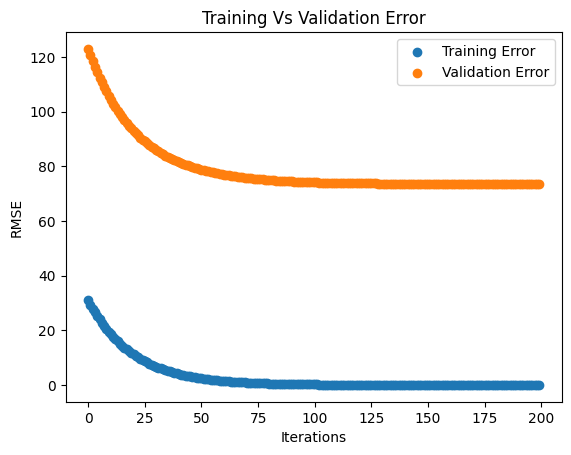

In [82]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

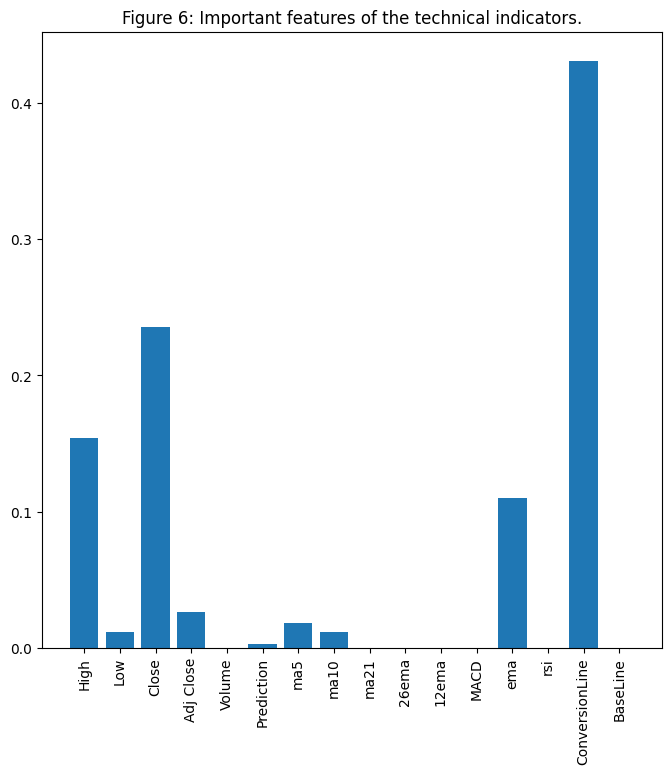

In [83]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure 6: Important features of the technical indicators.')
plt.show()

Conclusion :  Features High, Close, EMA and conversionline seem to be important features

In [84]:
# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
def new_dataset(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)

 # FOR REPRODUCIBILITY
np.random.seed(7)

# IMPORTING DATASET
data = data.reindex(index = data.index[::-1])

# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(data) + 1, 1)

# TAKING DIFFERENT INDICATORS FOR PREDICTION
HECC_avg = data.mean(axis = 1)
HECC_avg = data[['High', 'ema', 'Close','ConversionLine']].mean(axis = 1)
close_val = data[['Close']]

In [85]:
# PREPARATION OF TIME SERIES DATASE
HECC_avg = np.reshape(HECC_avg.values, (len(HECC_avg),1))
scaler = MinMaxScaler(feature_range=(0, 1))
HECC_avg = scaler.fit_transform(HECC_avg)


# TRAIN-TEST SPLIT
train_HECC = int(len(HECC_avg) * 0.8)
test_HECC = len(HECC_avg) - train_HECC
train_HECC, test_OHLC = HECC_avg[0:train_HECC,:], HECC_avg[train_HECC:len(HECC_avg),:]

# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = new_dataset(train_HECC, 1)
testX, testY = new_dataset(test_OHLC, 1)

# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

# LSTM MODEL
model = keras.Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

In [86]:
# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adagrad',metrics = ['mae']) # Try mae, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
2012/2012 - 10s - loss: 0.1591 - mae: 0.2754 - 10s/epoch - 5ms/step
Epoch 2/50
2012/2012 - 7s - loss: 0.1193 - mae: 0.2341 - 7s/epoch - 3ms/step
Epoch 3/50
2012/2012 - 6s - loss: 0.1004 - mae: 0.2263 - 6s/epoch - 3ms/step
Epoch 4/50
2012/2012 - 6s - loss: 0.0893 - mae: 0.2260 - 6s/epoch - 3ms/step
Epoch 5/50
2012/2012 - 6s - loss: 0.0824 - mae: 0.2289 - 6s/epoch - 3ms/step
Epoch 6/50
2012/2012 - 6s - loss: 0.0777 - mae: 0.2297 - 6s/epoch - 3ms/step
Epoch 7/50
2012/2012 - 6s - loss: 0.0744 - mae: 0.2309 - 6s/epoch - 3ms/step
Epoch 8/50
2012/2012 - 6s - loss: 0.0718 - mae: 0.2311 - 6s/epoch - 3ms/step
Epoch 9/50
2012/2012 - 6s - loss: 0.0697 - mae: 0.2304 - 6s/epoch - 3ms/step
Epoch 10/50
2012/2012 - 6s - loss: 0.0678 - mae: 0.2297 - 6s/epoch - 3ms/step
Epoch 11/50
2012/2012 - 6s - loss: 0.0660 - mae: 0.2284 - 6s/epoch - 3ms/step
Epoch 12/50
2012/2012 - 6s - loss: 0.0644 - mae: 0.2268 - 6s/epoch - 3ms/step
Epoch 13/50
2012/2012 - 6s - loss: 0.0628 - mae: 0.2252 - 6s/epoch - 3m

In [87]:
mae = model.evaluate(testX, testY, batch_size=16)
print('Mean Absolute Error for Y:', mae)



32/32 [==============================] - 1s 2ms/step - loss: 0.0176 - mae: 0.1324
Mean Absolute Error for Y: [0.017613643780350685, 0.1323857605457306]


In [88]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


# TRAINING rmse
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train : %.2f' % (trainScore))


# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))




16/16 [==============================] - 0s 2ms/step
Train : 16.46
Test RMSE: 22.05


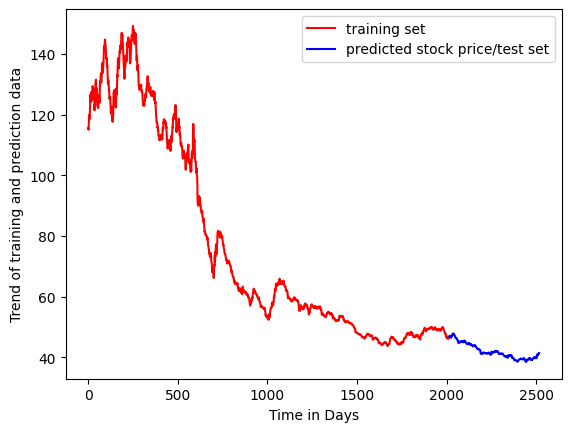

In [89]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(HECC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(HECC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(HECC_avg)-1, :] = testPredict

# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('Trend of training and prediction data')
plt.show()

Conclusion : Predictions seems to look ok